In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
x_train /= 255
x_test /= 255

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [8]:
#https://keras.io/api/optimizers/
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 77s 39ms/step - loss: 0.2040 - accuracy: 0.9390
Epoch 2/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0837 - accuracy: 0.9743
Epoch 3/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0595 - accuracy: 0.9811
Epoch 4/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0475 - accuracy: 0.9849
Epoch 5/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0363 - accuracy: 0.9876
Epoch 6/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0284 - accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.0250 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0227 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0205 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 75s 40m

In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.0741 - accuracy: 0.9825


[0.07414112240076065, 0.9825000166893005]

In [10]:
#Predicting the labels-DIGIT
y_predict = model.predict(x_test)

In [11]:
y_predict[0]

array([5.6500079e-14, 1.0290596e-12, 1.7391713e-08, 1.9208270e-10,
       7.8039361e-14, 2.7351737e-14, 2.0924516e-18, 9.9999940e-01,
       7.4698022e-13, 5.4013861e-07], dtype=float32)

In [12]:

import numpy as np
y_predicts=np.argmax(y_predict, axis=1)

In [13]:
y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [25]:
y_test.shape

(10000,)

In [16]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [17]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_predicts)

# Calculate the classification report
class_report = classification_report(y_test, y_predicts)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[ 972    1    0    0    0    0    3    1    2    1]
 [   0 1130    2    1    0    1    1    0    0    0]
 [   1    3 1014    3    1    0    2    6    2    0]
 [   0    0    1 1006    0    0    0    2    1    0]
 [   0    0    4    0  977    0    1    0    0    0]
 [   1    0    1   24    0  858    3    1    4    0]
 [   4    2    0    1    1    3  943    0    4    0]
 [   0    2    8    4    2    0    0 1010    1    1]
 [   2    0    5   10    6    1    0    4  943    3]
 [   1    4    0    8   19    0    0    4    1  972]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.95      1.00      0.97      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.96      0.98       892
           6       0.99      0.98      0.99     

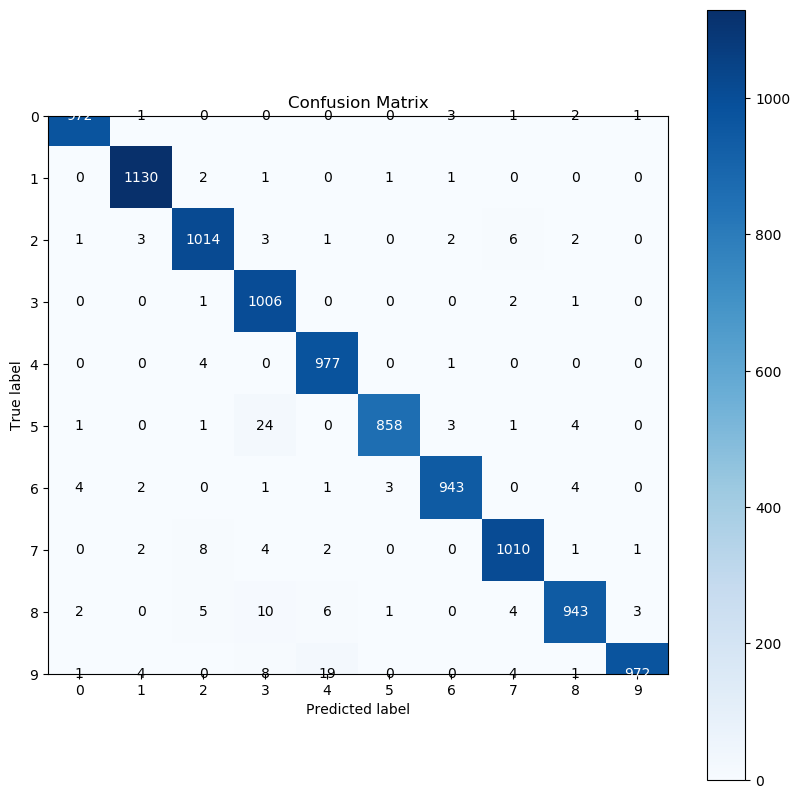

In [18]:
# Plot the confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Display the confusion matrix with text labels
fmt = '.0f'  # Format for integer display
thresh = conf_matrix.max() / 2.0
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], fmt),
                 ha='center', va='center',
                 color='white' if conf_matrix[i, j] > thresh else 'black')

plt.show()

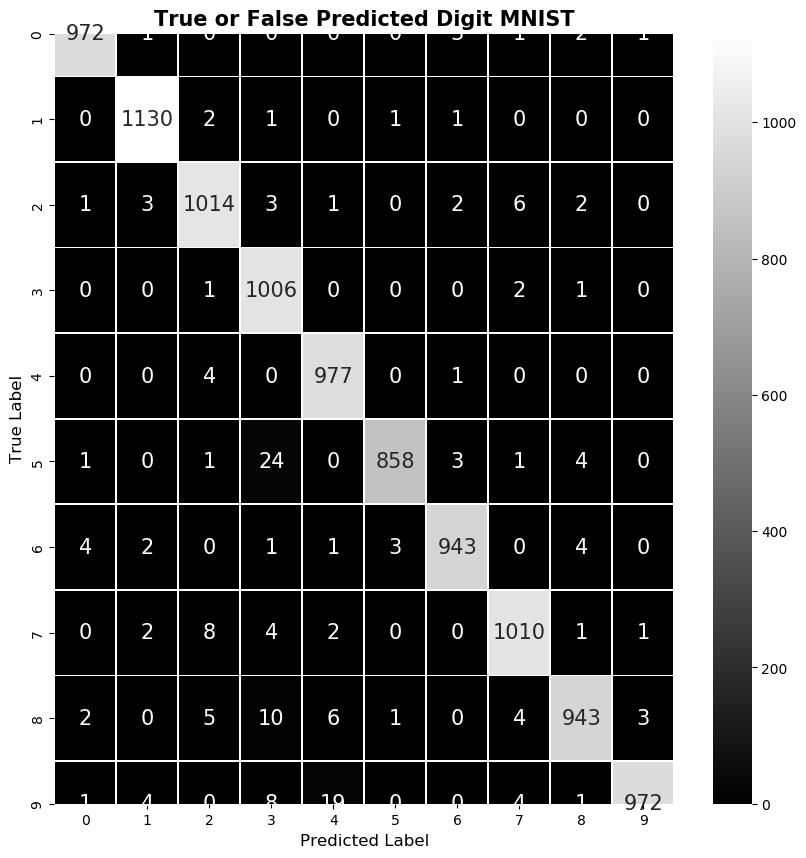

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the confusion matrix using seaborn
plt.style.use('seaborn-deep')
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 15}, linewidths=0.5, fmt="d", cmap="gray")

# Set title and labels
plt.title('True or False Predicted Digit MNIST', fontweight='bold', fontsize=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

# Show the plot
plt.show()

Predicted label: Six


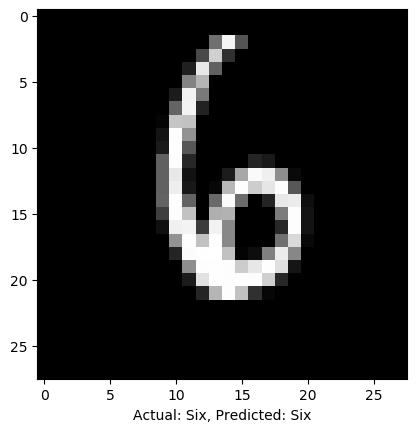

In [41]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the names of numbers in the dataset
col_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

# Choose an index of the image from the dataset you want to visualize
image_index = 6900

# Display the chosen image using a gray colormap
plt.imshow(x_test[image_index].reshape(28, 28), cmap='gray')

# Predict the label of the chosen image using the model
# Ensure the model is already defined and trained before this step
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))

# Get the predicted label's index and its corresponding name
predicted_label_index = pred.argmax()
predicted_label_name = col_names[predicted_label_index]

# Print the predicted label
print(f"Predicted label: {predicted_label_name}")

# Show the actual image along with the predicted and actual labels
actual_label_index = np.argmax(y_test[image_index])
actual_label_name = col_names[actual_label_index]
plt.xlabel(f"Actual: {actual_label_name}, Predicted: {predicted_label_name}")

# Display the plot
plt.show()


Image index: 6900, Predicted label: Six


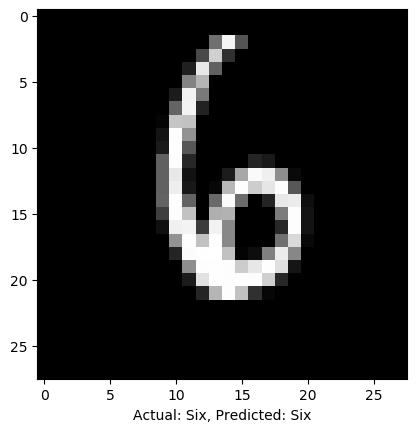

Image index: 6901, Predicted label: One


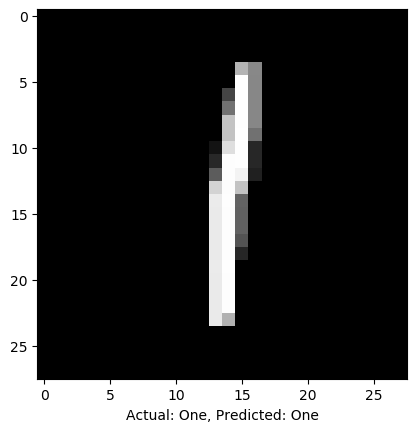

Image index: 6902, Predicted label: One


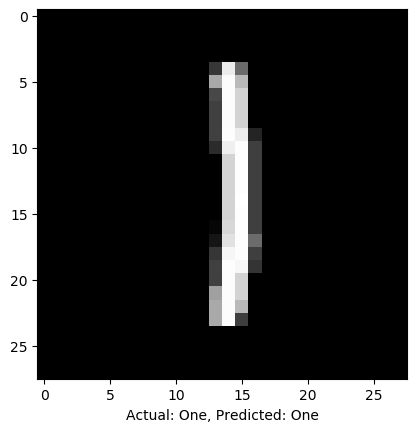

Image index: 6903, Predicted label: Nine


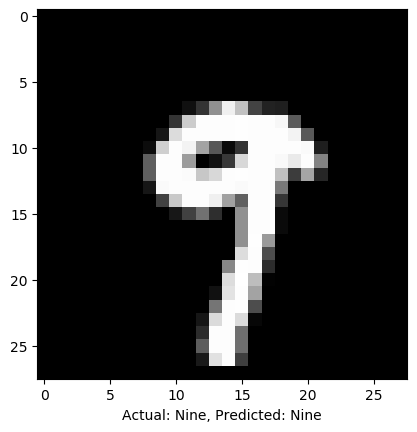

Image index: 6904, Predicted label: Eight


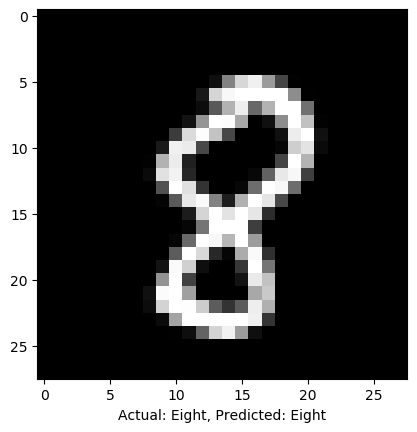

In [44]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the names of numbers in the dataset
col_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

# Define how many images you want to visualize
num_images_to_display = 5  # Change this number to visualize more or fewer images

# Start the loop at the desired index (e.g., 6900)
start_index = 6900

# Loop through the desired number of images
for i in range(num_images_to_display):
    # Calculate the current image index
    image_index = start_index + i
    
    # Display the chosen image using a gray colormap
    plt.imshow(x_test[image_index].reshape(28, 28), cmap='gray')
    
    # Predict the label of the chosen image using the model
    # Ensure the model is already defined and trained before this step
    pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
    
    # Get the predicted label's index and its corresponding name
    predicted_label_index = pred.argmax()
    predicted_label_name = col_names[predicted_label_index]
    
    # Print the predicted label
    print(f"Image index: {image_index}, Predicted label: {predicted_label_name}")
    
    # Show the actual image along with the predicted and actual labels
    actual_label_index = np.argmax(y_test[image_index])
    actual_label_name = col_names[actual_label_index]
    plt.xlabel(f"Actual: {actual_label_name}, Predicted: {predicted_label_name}")
    
    # Display the plot
    plt.show()
